## Price Prediction

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading and loading the dataset
df = pd.read_excel(r'C:\Users\INTEL\Desktop\Projects\Flight_Data_Train.xlsx')

In [3]:
#viewing first 5 rows of the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#viewing datatyes, null count, entries, columns, memory, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are no null values, only one column is in int64 datatype other 10 columns are of object datatype.

In [5]:
#checking dimensions
df.shape

(10683, 11)

There are 10683 rows and 11 columns in the dataset.

In [6]:
#viewing datatypes of all the columns 
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the columns are of object datatype except target column which is of integer datatype.

In [7]:
#checking all columns of the dataset
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
#statistical summary
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## EDA

In [9]:
#checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

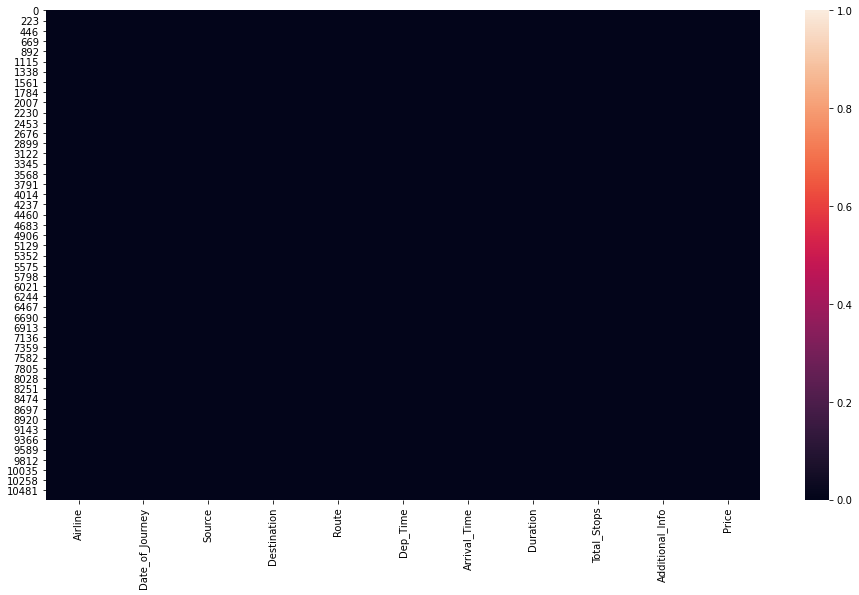

In [10]:
#another way to check missing values
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

There are null values in some columns we need to deal with them.

In [11]:
# reading and loading the another dataset
df1 = pd.read_excel(r'C:\Users\INTEL\Desktop\Projects\Flight _Test_set.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [12]:
#to check datatypes, null values, columns, entries, memory, etc
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


There are 10 columns in the dataset and all having the object datatype and there are no null values.

In [13]:
#to check dimensions of the dataset
df1.shape

(2671, 10)

There are 2671 rows and 10 columns columns in the another dataset.

In [14]:
#checking datatypes
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns have object datatype.

In [15]:
#viewing columns of the dataset
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [16]:
#statistical summary
df1.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [17]:
#checking null values
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

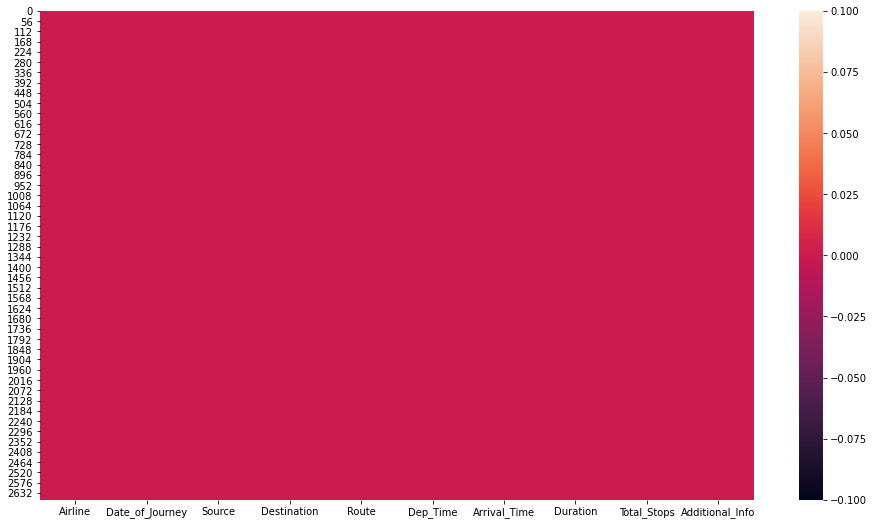

In [18]:
#another way to check missing values
plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())
plt.show()                  #visualizing null values using heatmap

There are no null values in the second dataset.

<AxesSubplot:xlabel='Price', ylabel='Count'>

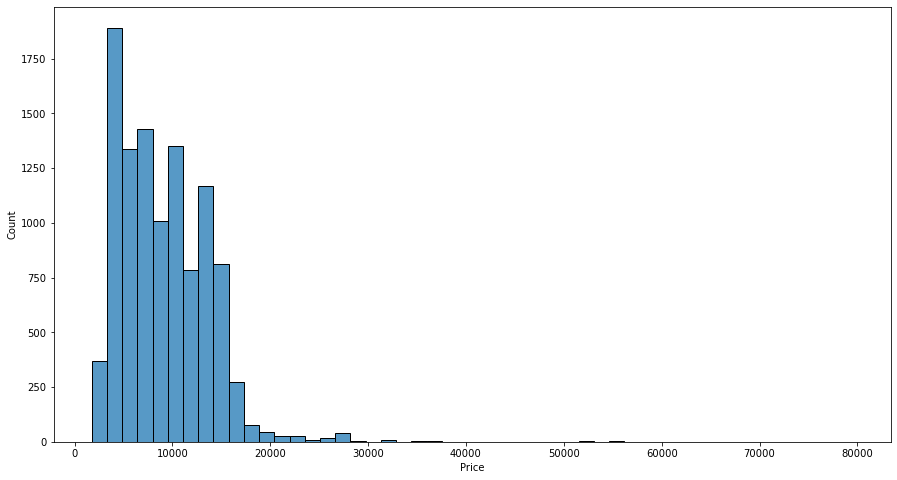

In [19]:
# Histplot of price column

plt.figure(figsize = (15 , 8))
sns.histplot(data = df , x = "Price" , bins = 50)

In [20]:
# Getting Unique values , value_counts

for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Airline column is/are : 12


The unique values in Airline column is/are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



****************************************************************************************************





Name: Arrival_Time, Length: 1343, dtype: int64



****************************************************************************************************



The number of unique values in Duration column is/are : 368


The unique values in Duration column is/are : ['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 1

### Converting Time columns to datetime format

In [21]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

In [22]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"])
df1["Dep_Time"] = pd.to_datetime(df1["Dep_Time"])
df1["Arrival_Time"] = pd.to_datetime(df1["Arrival_Time"])

In [23]:
#to know missing values, datatypes, etc of train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [24]:
#to know missing values, datatypes, etc of test dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


### Splitting data into date , month . year

In [25]:
df["day"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month
df["year"] = df["Date_of_Journey"].dt.year

In [26]:
df1["day"] = df1["Date_of_Journey"].dt.day
df1["Month"] = df1["Date_of_Journey"].dt.month
df1["year"] = df1["Date_of_Journey"].dt.year

In [27]:
df["dep_hour"] = df["Dep_Time"].dt.hour
df["dep_minutes"] = df["Dep_Time"].dt.minute

In [28]:
df1["dep_hour"] = df1["Dep_Time"].dt.hour
df1["dep_minutes"] = df1["Dep_Time"].dt.minute

In [29]:
df["arr_hour"] = df["Arrival_Time"].dt.hour
df["arr_minutes"] = df["Arrival_Time"].dt.minute

In [30]:
df1["arr_hour"] = df1["Arrival_Time"].dt.hour
df1["arr_minutes"] = df1["Arrival_Time"].dt.minute

### Converting Duration into minutes

In [31]:
def duration_convertion(x):
    if len(x.split()) == 2:
        one = int(x.split()[0][:-1])
        two = int(x.split()[1][:-1])
        return one * 60 + two
    else:
        return int(x[:-1]) * 60

In [32]:
df["Duration"] = df["Duration"].apply(duration_convertion)

In [33]:
df["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

In [34]:
df1["Duration"] = df1["Duration"].apply(duration_convertion)

In [35]:
df1["Duration"]

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: int64

#### Splitting Route column and preprocessing

In [36]:
df["Route"][4].split("→")

['BLR ', ' NAG ', ' DEL']

In [37]:
df1["Route"][4].split("→")

['BLR ', ' DEL']

In [38]:
df.iloc[np.where(df["Route"].isnull())[0][0]]

Airline                      Air India
Date_of_Journey    2019-06-05 00:00:00
Source                           Delhi
Destination                     Cochin
Route                              NaN
Dep_Time           2021-08-20 09:45:00
Arrival_Time       2021-05-07 09:25:00
Duration                          1420
Total_Stops                        NaN
Additional_Info                No info
Price                             7480
day                                  5
Month                                6
year                              2019
dep_hour                             9
dep_minutes                         45
arr_hour                             9
arr_minutes                         25
Name: 9039, dtype: object

In [39]:
df.loc[(df["Source"] == "Delhi") & (df["Destination"] == "Cochin")]["Total_Stops"].value_counts()

1 stop      3185
2 stops     1113
non-stop     213
3 stops       25
Name: Total_Stops, dtype: int64

In [40]:
df["Total_Stops"].fillna("1 stop" , inplace = True)

In [41]:
df.loc[(df["Source"] == "Delhi") & (df["Destination"] == "Cochin")]["Total_Stops"].value_counts()

1 stop      3186
2 stops     1113
non-stop     213
3 stops       25
Name: Total_Stops, dtype: int64

In [42]:
df.loc[(df["Source"] == "Delhi") & (df["Destination"] == "Cochin")]["Route"].value_counts()

DEL → BOM → COK                2376
DEL → HYD → COK                 326
DEL → JAI → BOM → COK           240
DEL → BLR → COK                 232
DEL → COK                       213
DEL → AMD → BOM → COK           205
DEL → MAA → COK                 146
DEL → IDR → BOM → COK            99
DEL → HYD → MAA → COK            83
DEL → NAG → BOM → COK            71
DEL → GOI → BOM → COK            58
DEL → HYD → BOM → COK            56
DEL → BHO → BOM → COK            50
DEL → CCU → BOM → COK            44
DEL → PNQ → COK                  42
DEL → LKO → BOM → COK            41
DEL → ATQ → BOM → COK            40
DEL → JDH → BOM → COK            37
DEL → BDQ → BOM → COK            28
DEL → AMD → COK                  25
DEL → UDR → BOM → COK            18
DEL → RPR → NAG → BOM → COK      17
DEL → LKO → COK                  17
DEL → TRV → COK                  16
DEL → MAA → BOM → COK            16
DEL → IXC → BOM → COK            13
DEL → IXU → BOM → COK            12
DEL → GWL → IDR → BOM → COK 

In [43]:
df["Route"].fillna("DEL → BOM → COK" , inplace = True)

In [44]:
df.loc[(df["Source"] == "Delhi") & (df["Destination"] == "Cochin")]["Route"].value_counts()

DEL → BOM → COK                2377
DEL → HYD → COK                 326
DEL → JAI → BOM → COK           240
DEL → BLR → COK                 232
DEL → COK                       213
DEL → AMD → BOM → COK           205
DEL → MAA → COK                 146
DEL → IDR → BOM → COK            99
DEL → HYD → MAA → COK            83
DEL → NAG → BOM → COK            71
DEL → GOI → BOM → COK            58
DEL → HYD → BOM → COK            56
DEL → BHO → BOM → COK            50
DEL → CCU → BOM → COK            44
DEL → PNQ → COK                  42
DEL → LKO → BOM → COK            41
DEL → ATQ → BOM → COK            40
DEL → JDH → BOM → COK            37
DEL → BDQ → BOM → COK            28
DEL → AMD → COK                  25
DEL → UDR → BOM → COK            18
DEL → RPR → NAG → BOM → COK      17
DEL → LKO → COK                  17
DEL → TRV → COK                  16
DEL → MAA → BOM → COK            16
DEL → IXC → BOM → COK            13
DEL → IXU → BOM → COK            12
DEL → GWL → IDR → BOM → COK 

#### Saving splitted values into a nested list

In [45]:
sam = []
for i in range(len(df)):
    sam.append(df["Route"][i].split("→"))

In [46]:
sam

[['BLR ', ' DEL'],
 ['CCU ', ' IXR ', ' BBI ', ' BLR'],
 ['DEL ', ' LKO ', ' BOM ', ' COK'],
 ['CCU ', ' NAG ', ' BLR'],
 ['BLR ', ' NAG ', ' DEL'],
 ['CCU ', ' BLR'],
 ['BLR ', ' BOM ', ' DEL'],
 ['BLR ', ' BOM ', ' DEL'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BLR ', ' COK'],
 ['CCU ', ' BLR'],
 ['MAA ', ' CCU'],
 ['CCU ', ' BOM ', ' BLR'],
 ['CCU ', ' BLR'],
 ['DEL ', ' AMD ', ' BOM ', ' COK'],
 ['DEL ', ' PNQ ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' CCU ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' COK ', ' DEL'],
 ['BLR ', ' DEL'],
 ['BLR ', ' DEL'],
 ['CCU ', ' BOM ', ' BLR'],
 ['DEL ', ' IDR ', ' BOM ', ' COK'],
 ['DEL ', ' LKO ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' DEL'],
 ['MAA ', ' CCU'],
 ['MAA ', ' CCU'],
 ['CCU ', ' GAU ', ' DEL ', ' BLR'],
 ['BLR ', ' DEL'],
 ['DEL ', ' NAG ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['CCU ', ' MAA ', ' BLR'],


In [47]:
sam_df1 = []
for i in range(len(df1)):
    sam_df1.append(df1["Route"][i].split("→"))

In [48]:
sam_df1

[['DEL ', ' BOM ', ' COK'],
 ['CCU ', ' MAA ', ' BLR'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' DEL'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' TRV ', ' DEL'],
 ['CCU ', ' HYD ', ' BLR'],
 ['CCU ', ' BLR'],
 ['CCU ', ' BOM ', ' BLR'],
 ['DEL ', ' MAA ', ' BOM ', ' COK'],
 ['DEL ', ' HYD ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' HYD ', ' COK'],
 ['CCU ', ' DEL ', ' BLR'],
 ['DEL ', ' BOM ', ' COK'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' BOM ', ' COK'],
 ['CCU ', ' BOM ', ' BLR'],
 ['BLR ', ' BOM ', ' DEL'],
 ['DEL ', ' JAI ', ' BOM ', ' COK'],
 ['BLR ', ' DEL'],
 ['DEL ', ' BOM ', ' COK'],
 ['CCU ', ' BLR'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BOM ', ' COK'],
 ['CCU ', ' BLR'],
 ['DEL ', ' BOM ', ' COK'],
 ['DEL ', ' BHO ', ' BOM ', ' COK'],
 ['BLR ', ' DEL'],
 ['BOM ', ' HYD'],
 ['BLR ', ' DEL'],
 ['BOM ', ' HYD'],
 ['BLR ', ' BOM ',

In [49]:
# Getting max number of stops / routes

lens = []
for i in sam:
    lens.append((len(i) , i))  
max(lens)[0]

6

In [50]:
for i in lens:
    if i[0] == 6:

        print(i[1])

['BLR ', ' CCU ', ' BBI ', ' HYD ', ' VGA ', ' DEL']


In [51]:
# Filling all route columns with "None" values

for i in sam:
    while len(i) <= 5:
        i.append("None")

In [52]:
for i in sam_df1:
    while len(i) <= 5:
        i.append("None")

In [53]:
sam

[['BLR ', ' DEL', 'None', 'None', 'None', 'None'],
 ['CCU ', ' IXR ', ' BBI ', ' BLR', 'None', 'None'],
 ['DEL ', ' LKO ', ' BOM ', ' COK', 'None', 'None'],
 ['CCU ', ' NAG ', ' BLR', 'None', 'None', 'None'],
 ['BLR ', ' NAG ', ' DEL', 'None', 'None', 'None'],
 ['CCU ', ' BLR', 'None', 'None', 'None', 'None'],
 ['BLR ', ' BOM ', ' DEL', 'None', 'None', 'None'],
 ['BLR ', ' BOM ', ' DEL', 'None', 'None', 'None'],
 ['BLR ', ' BOM ', ' DEL', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['DEL ', ' BLR ', ' COK', 'None', 'None', 'None'],
 ['CCU ', ' BLR', 'None', 'None', 'None', 'None'],
 ['MAA ', ' CCU', 'None', 'None', 'None', 'None'],
 ['CCU ', ' BOM ', ' BLR', 'None', 'None', 'None'],
 ['CCU ', ' BLR', 'None', 'None', 'None', 'None'],
 ['DEL ', ' AMD ', ' BOM ', ' COK', 'None', 'None'],
 ['DEL ', ' PNQ ', ' COK', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['DEL ', ' CCU ', ' BOM ', ' COK', 'None', 'None'],
 ['DEL ', ' B

In [54]:
sam_df1

[['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['CCU ', ' MAA ', ' BLR', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['BLR ', ' DEL', 'None', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['BLR ', ' TRV ', ' DEL', 'None', 'None', 'None'],
 ['CCU ', ' HYD ', ' BLR', 'None', 'None', 'None'],
 ['CCU ', ' BLR', 'None', 'None', 'None', 'None'],
 ['CCU ', ' BOM ', ' BLR', 'None', 'None', 'None'],
 ['DEL ', ' MAA ', ' BOM ', ' COK', 'None', 'None'],
 ['DEL ', ' HYD ', ' COK', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['BLR ', ' BOM ', ' DEL', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['BLR ', ' BOM ', ' DEL', 'None', 'None', 'None'],
 ['DEL ', ' HYD ', ' COK', 'None', 'None', 'None'],
 ['CCU ', ' DEL ', ' BLR', 'None', 'None', 'None'],
 ['DEL ', ' BOM ', ' COK', 'None', 'None', 'None'],
 ['BLR ', ' B

#### Converting to dataframe

In [55]:
df_routes = pd.DataFrame(sam , columns = ["R1" , "R2" , "R3" , "R4" , "R5" , "R6"])
df_routes

,R1,R2,R3,R4,R5,R6
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...
10678,CCU,BLR,None,None,None,None
10679,CCU,BLR,None,None,None,None
10680,BLR,DEL,None,None,None,None
10681,BLR,DEL,None,None,None,None


In [56]:
df1_routes = pd.DataFrame(sam_df1 , columns = ["R1" , "R2" , "R3" , "R4" , "R5" , "R6"])
df1_routes

,R1,R2,R3,R4,R5,R6
0,DEL,BOM,COK,None,None,None
1,CCU,MAA,BLR,None,None,None
2,DEL,BOM,COK,None,None,None
3,DEL,BOM,COK,None,None,None
4,BLR,DEL,None,None,None,None
...,...,...,...,...,...,...
2666,CCU,DEL,BLR,None,None,None
2667,CCU,BLR,None,None,None,None
2668,DEL,BOM,COK,None,None,None
2669,DEL,BOM,COK,None,None,None


### Lable Encoding Large unique values in categorical columns.
Used concat approach since test data has previously unknown / unseen values

In [57]:
df_routes["Source"] = "Train"
df1_routes["Source"] = "Test"

In [58]:
routes = pd.concat([df_routes , df1_routes])

In [59]:
routes

,R1,R2,R3,R4,R5,R6,Source
0,BLR,DEL,None,None,None,None,Train
1,CCU,IXR,BBI,BLR,None,None,Train
2,DEL,LKO,BOM,COK,None,None,Train
3,CCU,NAG,BLR,None,None,None,Train
4,BLR,NAG,DEL,None,None,None,Train
...,...,...,...,...,...,...,...
2666,CCU,DEL,BLR,None,None,None,Test
2667,CCU,BLR,None,None,None,None,Test
2668,DEL,BOM,COK,None,None,None,Test
2669,DEL,BOM,COK,None,None,None,Test


In [60]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in ["R1" , "R2" , "R3" , "R4" , "R5" , "R6"]:
    routes[i] = lb.fit_transform(routes[i])

In [61]:
routes

,R1,R2,R3,R4,R5,R6,Source
0,0,13,30,13,5,1,Train
1,2,25,1,3,5,1,Train
2,3,32,4,5,5,1,Train
3,2,34,3,13,5,1,Train
4,0,34,8,13,5,1,Train
...,...,...,...,...,...,...,...
2666,2,14,3,13,5,1,Test
2667,2,5,30,13,5,1,Test
2668,3,7,6,13,5,1,Test
2669,3,7,6,13,5,1,Test


In [62]:
df_routes = routes.loc[routes["Source"] == "Train"]
df_routes

,R1,R2,R3,R4,R5,R6,Source
0,0,13,30,13,5,1,Train
1,2,25,1,3,5,1,Train
2,3,32,4,5,5,1,Train
3,2,34,3,13,5,1,Train
4,0,34,8,13,5,1,Train
...,...,...,...,...,...,...,...
10678,2,5,30,13,5,1,Train
10679,2,5,30,13,5,1,Train
10680,0,13,30,13,5,1,Train
10681,0,13,30,13,5,1,Train


In [63]:
df1_routes = routes.loc[routes["Source"] == "Test"]
df1_routes

,R1,R2,R3,R4,R5,R6,Source
0,3,7,6,13,5,1,Test
1,2,33,3,13,5,1,Test
2,3,7,6,13,5,1,Test
3,3,7,6,13,5,1,Test
4,0,13,30,13,5,1,Test
...,...,...,...,...,...,...,...
2666,2,14,3,13,5,1,Test
2667,2,5,30,13,5,1,Test
2668,3,7,6,13,5,1,Test
2669,3,7,6,13,5,1,Test


In [64]:
df_routes.drop(["Source"] , axis = 1 , inplace = True)
df1_routes.drop(["Source"] , axis = 1 , inplace = True)

In [65]:
df_routes

,R1,R2,R3,R4,R5,R6
0,0,13,30,13,5,1
1,2,25,1,3,5,1
2,3,32,4,5,5,1
3,2,34,3,13,5,1
4,0,34,8,13,5,1
...,...,...,...,...,...,...
10678,2,5,30,13,5,1
10679,2,5,30,13,5,1
10680,0,13,30,13,5,1
10681,0,13,30,13,5,1


In [66]:
df1_routes

,R1,R2,R3,R4,R5,R6
0,3,7,6,13,5,1
1,2,33,3,13,5,1
2,3,7,6,13,5,1
3,3,7,6,13,5,1
4,0,13,30,13,5,1
...,...,...,...,...,...,...
2666,2,14,3,13,5,1
2667,2,5,30,13,5,1
2668,3,7,6,13,5,1
2669,3,7,6,13,5,1


In [67]:
pd.get_option("display.max_columns")
df = pd.concat([df , df_routes] , axis = 1)

In [68]:
df1 = pd.concat([df1 , df1_routes] , axis = 1)

In [69]:
df.head().T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Date_of_Journey,2019-03-24 00:00:00,2019-01-05 00:00:00,2019-09-06 00:00:00,2019-12-05 00:00:00,2019-01-03 00:00:00
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,2021-08-20 22:20:00,2021-08-20 05:50:00,2021-08-20 09:25:00,2021-08-20 18:05:00,2021-08-20 16:50:00
Arrival_Time,2021-03-22 01:10:00,2021-08-20 13:15:00,2021-06-10 04:25:00,2021-08-20 23:30:00,2021-08-20 21:35:00
Duration,170,445,1140,325,285
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info


In [70]:
df1.head().T

,0,1,2,3,4
Airline,Jet Airways,IndiGo,Jet Airways,Multiple carriers,Air Asia
Date_of_Journey,2019-06-06 00:00:00,2019-12-05 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-06-24 00:00:00
Source,Delhi,Kolkata,Delhi,Delhi,Banglore
Destination,Cochin,Banglore,Cochin,Cochin,Delhi
Route,DEL → BOM → COK,CCU → MAA → BLR,DEL → BOM → COK,DEL → BOM → COK,BLR → DEL
Dep_Time,2021-08-20 17:30:00,2021-08-20 06:20:00,2021-08-20 19:15:00,2021-08-20 08:00:00,2021-08-20 23:55:00
Arrival_Time,2021-06-07 04:25:00,2021-08-20 10:20:00,2021-05-22 19:00:00,2021-08-20 21:00:00,2021-06-25 02:45:00
Duration,655,240,1425,780,170
Total_Stops,1 stop,1 stop,1 stop,1 stop,non-stop
Additional_Info,No info,No info,In-flight meal not included,No info,No info


In [71]:
#checking null values of the train dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
day                0
Month              0
year               0
dep_hour           0
dep_minutes        0
arr_hour           0
arr_minutes        0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
dtype: int64

In [72]:
#checking null values of the test dataset
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
day                0
Month              0
year               0
dep_hour           0
dep_minutes        0
arr_hour           0
arr_minutes        0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
dtype: int64

### Preprocessing Stops column

In [73]:
df["Stops"] = df["Total_Stops"].str.split(" ").str[0]
df["Stops"].replace("non-stop" , 0 , inplace = True)

In [74]:
df["Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Stops, Length: 10683, dtype: object

In [75]:
df1["Stops"] = df1["Total_Stops"].str.split(" ").str[0]
df1["Stops"].replace("non-stop" , 0 , inplace = True)

In [76]:
df1["Stops"]

0       1
1       1
2       1
3       1
4       0
       ..
2666    1
2667    0
2668    1
2669    1
2670    1
Name: Stops, Length: 2671, dtype: object

### Dropping Features extracted columns

In [77]:
df.drop(["Date_of_Journey" , "Route" , "Dep_Time" , "Arrival_Time" , "Total_Stops"] , axis = 1 , inplace = True)

In [78]:
df1.drop(["Date_of_Journey" , "Route" , "Dep_Time" , "Arrival_Time" , "Total_Stops"] , axis = 1 , inplace = True)

In [79]:
df.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,day,Month,year,dep_hour,dep_minutes,arr_hour,arr_minutes,R1,R2,R3,R4,R5,R6,Stops
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,3,2019,22,20,1,10,0,13,30,13,5,1,0
1,Air India,Kolkata,Banglore,445,No info,7662,5,1,2019,5,50,13,15,2,25,1,3,5,1,2
2,Jet Airways,Delhi,Cochin,1140,No info,13882,6,9,2019,9,25,4,25,3,32,4,5,5,1,2
3,IndiGo,Kolkata,Banglore,325,No info,6218,5,12,2019,18,5,23,30,2,34,3,13,5,1,1
4,IndiGo,Banglore,New Delhi,285,No info,13302,3,1,2019,16,50,21,35,0,34,8,13,5,1,1


In [80]:
df1.head()

,Airline,Source,Destination,Duration,Additional_Info,day,Month,year,dep_hour,dep_minutes,arr_hour,arr_minutes,R1,R2,R3,R4,R5,R6,Stops
0,Jet Airways,Delhi,Cochin,655,No info,6,6,2019,17,30,4,25,3,7,6,13,5,1,1
1,IndiGo,Kolkata,Banglore,240,No info,5,12,2019,6,20,10,20,2,33,3,13,5,1,1
2,Jet Airways,Delhi,Cochin,1425,In-flight meal not included,21,5,2019,19,15,19,0,3,7,6,13,5,1,1
3,Multiple carriers,Delhi,Cochin,780,No info,21,5,2019,8,0,21,0,3,7,6,13,5,1,1
4,Air Asia,Banglore,Delhi,170,No info,24,6,2019,23,55,2,45,0,13,30,13,5,1,0


In [81]:
# to view datatypes, null values of train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   day              10683 non-null  int64 
 7   Month            10683 non-null  int64 
 8   year             10683 non-null  int64 
 9   dep_hour         10683 non-null  int64 
 10  dep_minutes      10683 non-null  int64 
 11  arr_hour         10683 non-null  int64 
 12  arr_minutes      10683 non-null  int64 
 13  R1               10683 non-null  int32 
 14  R2               10683 non-null  int32 
 15  R3               10683 non-null  int32 
 16  R4               10683 non-null  int32 
 17  R5               10683 non-null

In [82]:
#checking missing values of train dataset
df.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Additional_Info    0
Price              0
day                0
Month              0
year               0
dep_hour           0
dep_minutes        0
arr_hour           0
arr_minutes        0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
Stops              0
dtype: int64

In [83]:
#to view datatypes, null values, etc
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Duration         2671 non-null   int64 
 4   Additional_Info  2671 non-null   object
 5   day              2671 non-null   int64 
 6   Month            2671 non-null   int64 
 7   year             2671 non-null   int64 
 8   dep_hour         2671 non-null   int64 
 9   dep_minutes      2671 non-null   int64 
 10  arr_hour         2671 non-null   int64 
 11  arr_minutes      2671 non-null   int64 
 12  R1               2671 non-null   int32 
 13  R2               2671 non-null   int32 
 14  R3               2671 non-null   int32 
 15  R4               2671 non-null   int32 
 16  R5               2671 non-null   int32 
 17  R6               2671 non-null   

In [84]:
#checking missing values of test dataset
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Additional_Info    0
day                0
Month              0
year               0
dep_hour           0
dep_minutes        0
arr_hour           0
arr_minutes        0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
Stops              0
dtype: int64

In [85]:
# Categorical Columns

cats = df.select_dtypes(include="object").columns.to_list()
cats

['Airline', 'Source', 'Destination', 'Additional_Info', 'Stops']

In [86]:
# Non - categorical columns

ints = df.select_dtypes(exclude="object").columns.to_list()
ints

['Duration',
 'Price',
 'day',
 'Month',
 'year',
 'dep_hour',
 'dep_minutes',
 'arr_hour',
 'arr_minutes',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6']

In [87]:
df[["Source" , "R1"]]

,Source,R1
0,Banglore,0
1,Kolkata,2
2,Delhi,3
3,Kolkata,2
4,Banglore,0
...,...,...
10678,Kolkata,2
10679,Kolkata,2
10680,Banglore,0
10681,Banglore,0


In [88]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Airline column is/are : 12


The unique values in Airline column is/are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



****************************************************************************************************





The value counts for each value in R2 column is/are :  
7     3868
13    1552
5      724
14     663
19     621
20     565
8      381
0      263
28     260
33     259
6      236
10     213
2      114
21     106
15      88
34      83
9       75
16      72
37      66
32      61
4       57
25      52
29      41
1       40
3       38
23      21
41      19
38      19
40      18
11      16
42      15
24      13
26      12
43      11
31      10
36      10
17       8
18       3
12       3
39       2
27       1
44       1
22       1
30       1
35       1
Name: R2, dtype: int64



****************************************************************************************************



The number of unique values in R3 column is/are : 30


The unique values in R3 column is/are : [30  1  4  3  8  6  9  0 13 21 22  7 11 23 10  2 19 15 17 14 28 24 20 26
 12 16  5 27 29 18]


The value counts for each value in R3 column is/are :  
30    3491
6     3186
3     1834
4     1088
8      562
9      120
22     

Dropping "R1" as it has same values as of "Source" column , "year" column as only one value (2019)

In [89]:
df.drop(["year" , "R1"] , axis = 1 , inplace = True)

In [90]:
df1.drop(["year" , "R1"] , axis = 1 , inplace = True)

In [91]:
df.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,R5,R6,Stops
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,3,22,20,1,10,13,30,13,5,1,0
1,Air India,Kolkata,Banglore,445,No info,7662,5,1,5,50,13,15,25,1,3,5,1,2
2,Jet Airways,Delhi,Cochin,1140,No info,13882,6,9,9,25,4,25,32,4,5,5,1,2
3,IndiGo,Kolkata,Banglore,325,No info,6218,5,12,18,5,23,30,34,3,13,5,1,1
4,IndiGo,Banglore,New Delhi,285,No info,13302,3,1,16,50,21,35,34,8,13,5,1,1


In [92]:
df1.head()

,Airline,Source,Destination,Duration,Additional_Info,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,R5,R6,Stops
0,Jet Airways,Delhi,Cochin,655,No info,6,6,17,30,4,25,7,6,13,5,1,1
1,IndiGo,Kolkata,Banglore,240,No info,5,12,6,20,10,20,33,3,13,5,1,1
2,Jet Airways,Delhi,Cochin,1425,In-flight meal not included,21,5,19,15,19,0,7,6,13,5,1,1
3,Multiple carriers,Delhi,Cochin,780,No info,21,5,8,0,21,0,7,6,13,5,1,1
4,Air Asia,Banglore,Delhi,170,No info,24,6,23,55,2,45,13,30,13,5,1,0


## Data Visualization



#### Box Plots

<AxesSubplot:xlabel='Airline', ylabel='Price'>

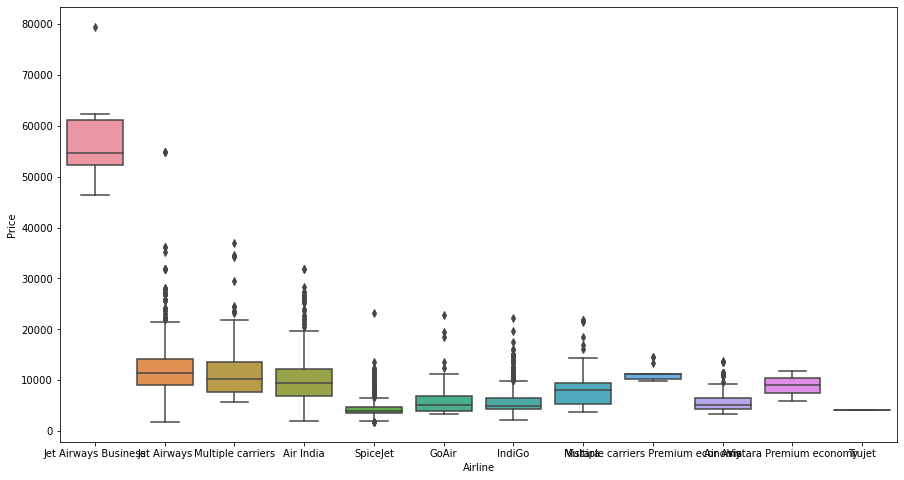

In [93]:
#visualisation of "Airline" on x axis and "price" on y axis by using boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x = "Airline" , y = "Price", data = df.sort_values('Price', ascending = False))    #binary variant

<AxesSubplot:xlabel='Stops', ylabel='Price'>

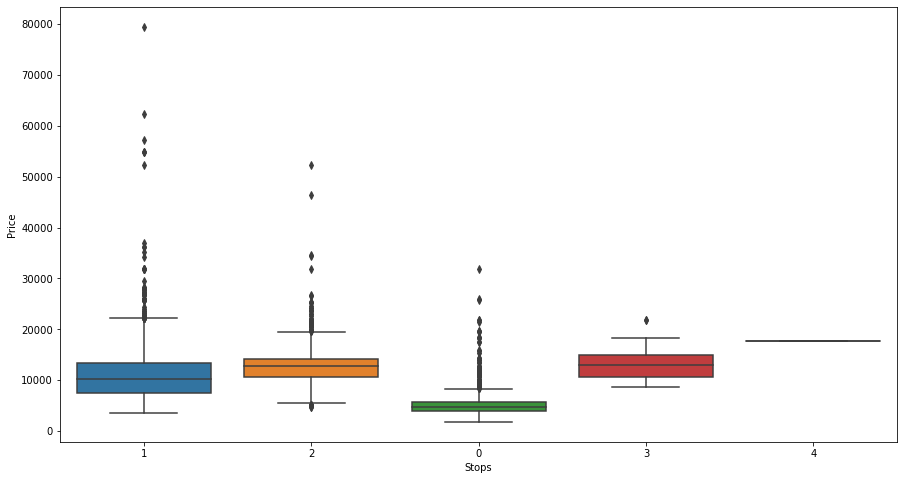

In [94]:
#visualisation of "Stops" on x axis and "Price" on y axis by using boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x = "Stops", y = "Price", data = df.sort_values("Price", ascending = False))        #binary variant

<AxesSubplot:xlabel='Source', ylabel='Price'>

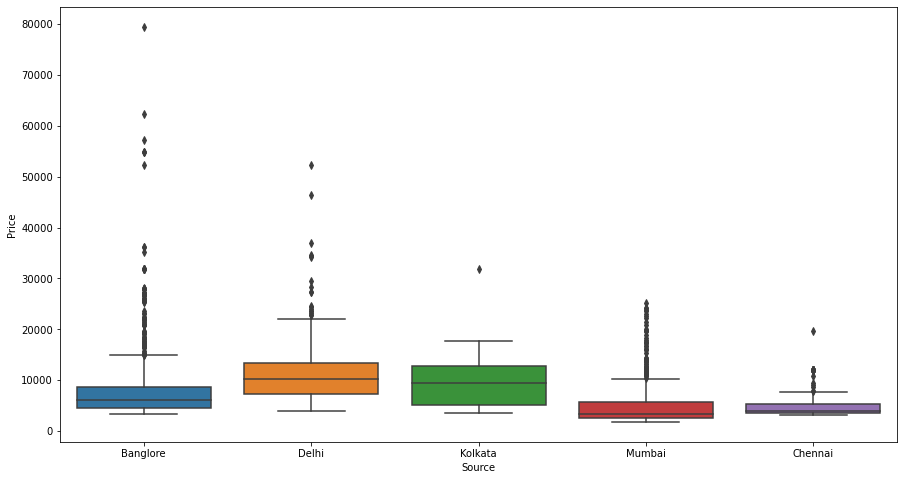

In [95]:
#visualisation of "Source" on x axis and "Price" on y axis by using boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x = "Source", y = "Price", data = df.sort_values("Price", ascending = False))         #binary variant

<AxesSubplot:xlabel='Destination', ylabel='Price'>

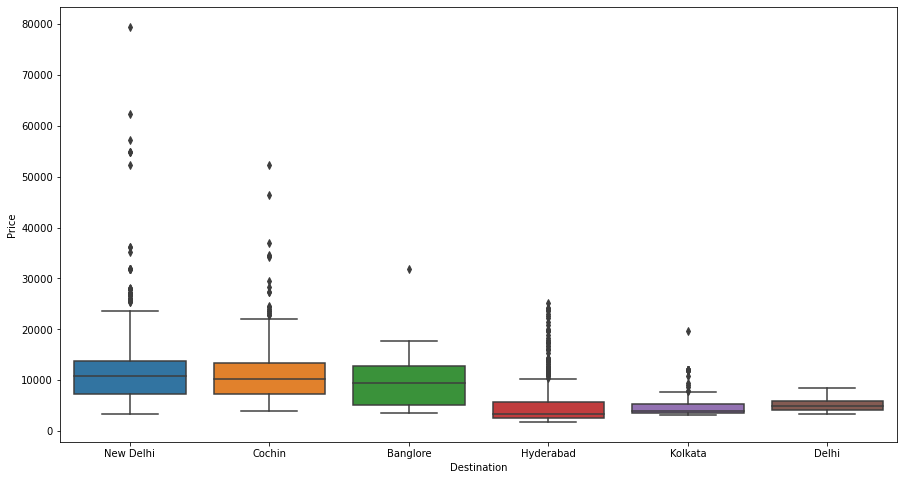

In [96]:
#visualisation of "Destination" on x axis and "Price" on y axis by using boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x = "Destination", y = "Price", data = df.sort_values("Price", ascending = False))     #binary variant

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

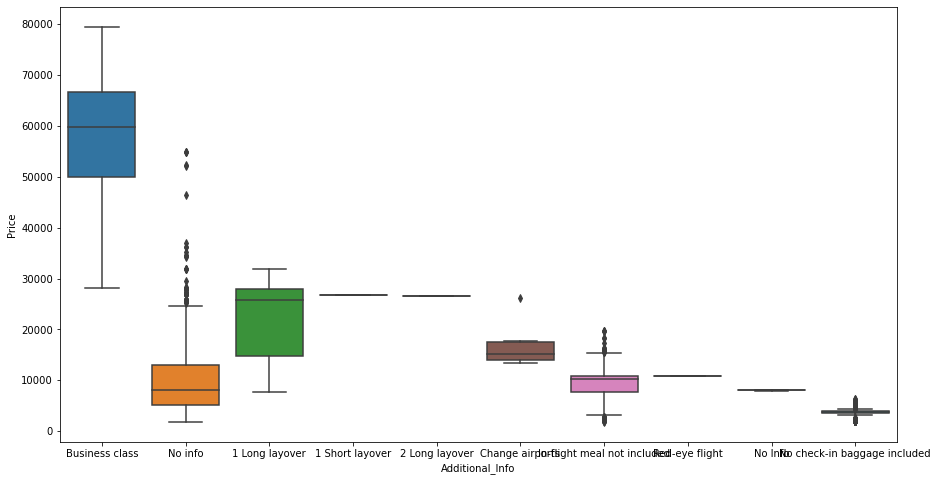

In [97]:
#visualisation of "Additional_Info" on x axis and "Price" on y axis by using boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x = "Additional_Info", y = "Price", data = df.sort_values("Price", ascending = False))       #binary variant

#### Hist plots

<AxesSubplot:xlabel='Duration', ylabel='Count'>

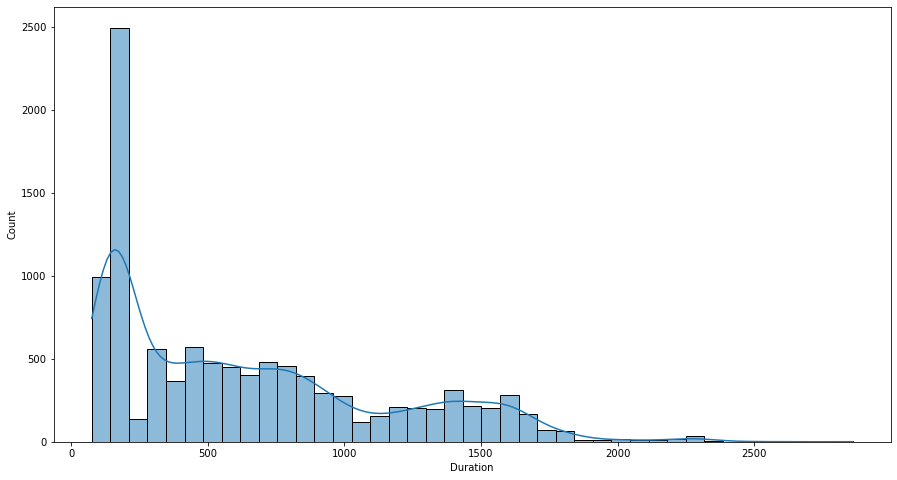

In [98]:
#visualisation of "Duration" on x axis by using histplot
plt.figure(figsize = (15 , 8))
sns.histplot(data = df , x = "Duration" , kde = True)

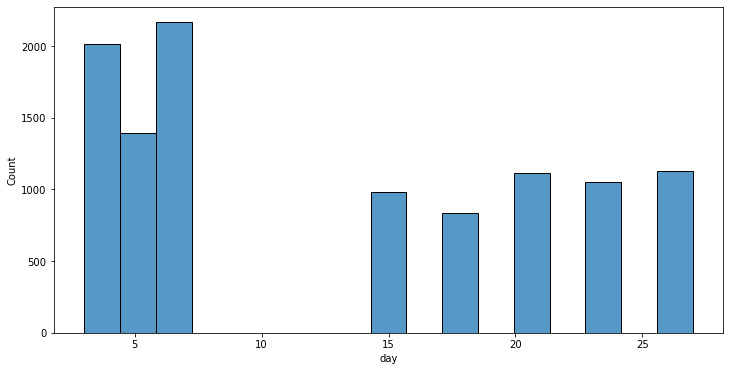

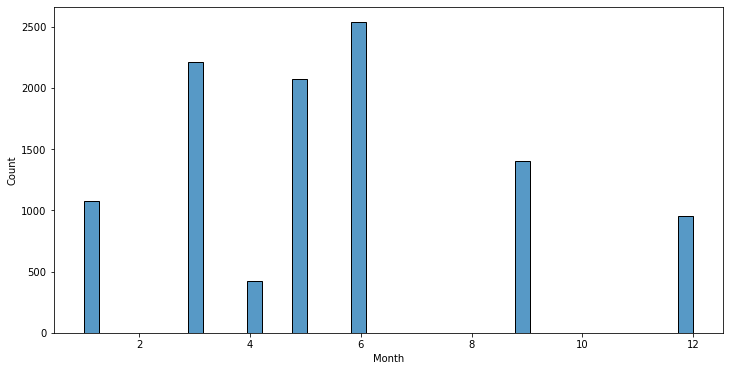

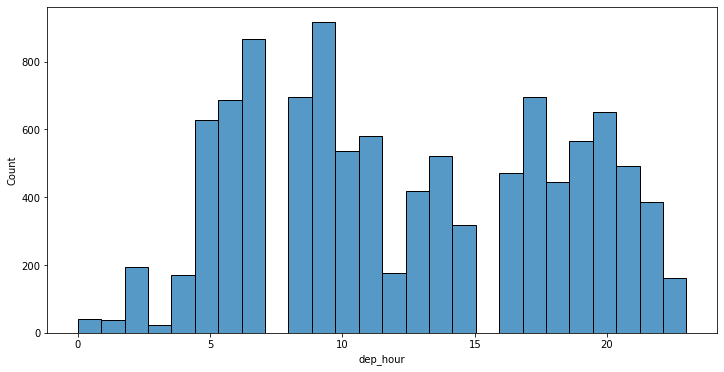

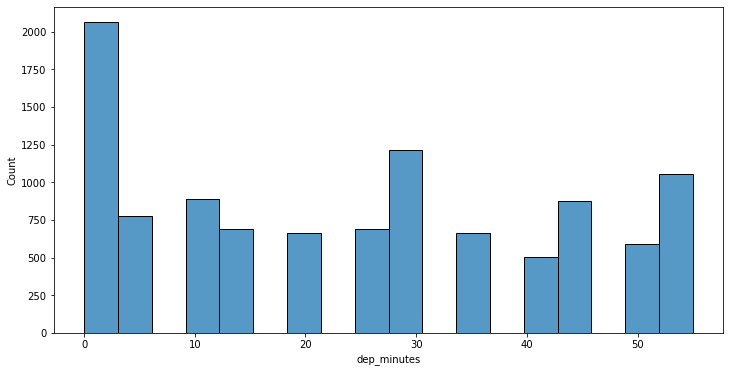

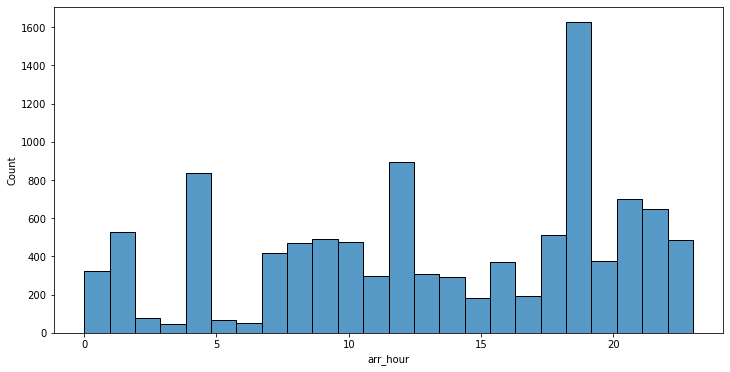

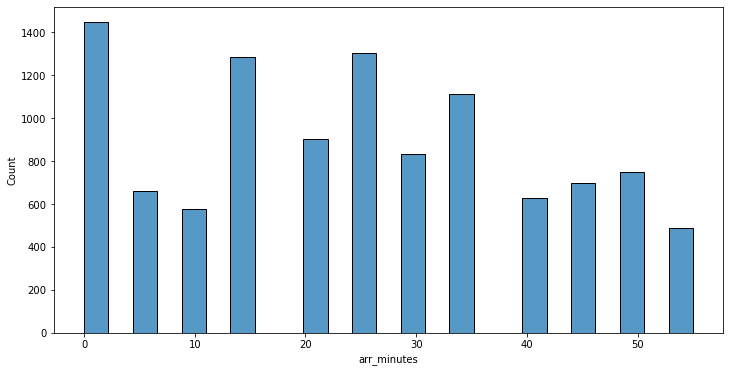

In [99]:
#visualisation of some columns by using hisplot
for i in ["day" , "Month" , "dep_hour" , "dep_minutes" , "arr_hour" , "arr_minutes"]:
    plt.figure(figsize = (12 , 6))
    sns.histplot(data = df , x = i)
    plt.show()

#### Count plots

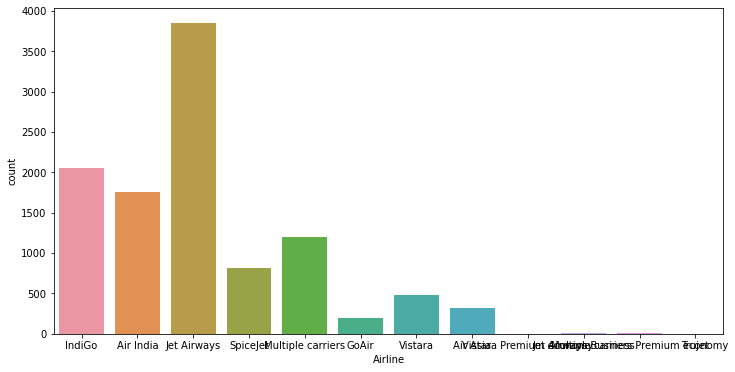

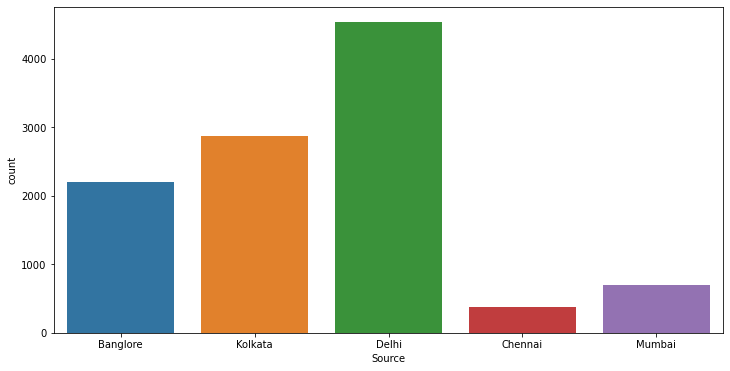

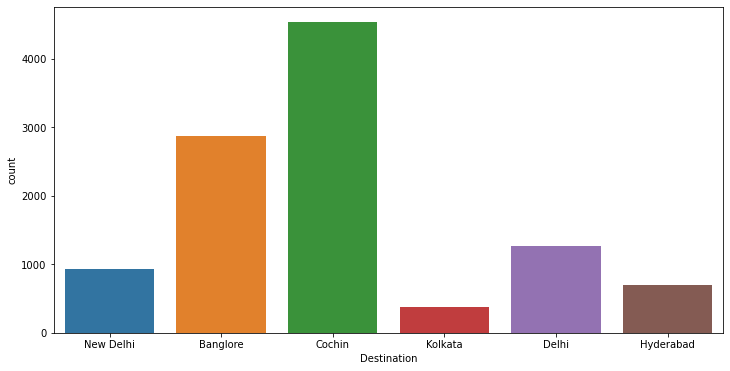

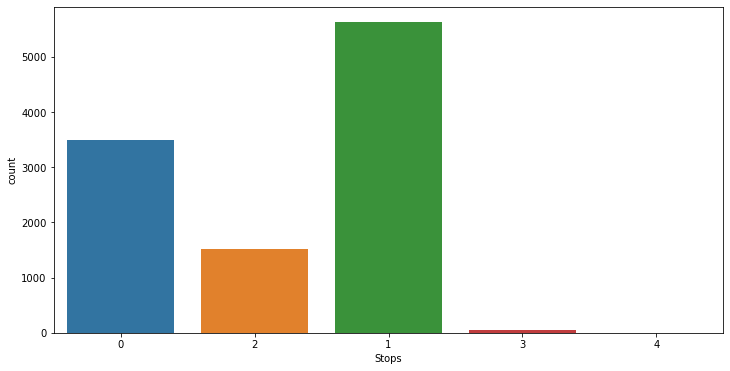

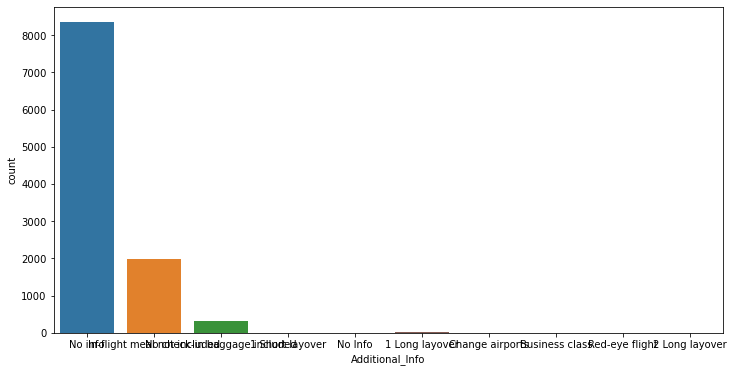

In [100]:
#visualisation by countplot
for i in ["Airline" , "Source" , "Destination" , "Stops" , "Additional_Info"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = df , x = i)
    plt.show()
    print("\n\n")

### Correlation Matrix

In [101]:
df.corr()

,Duration,Price,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,R5,R6
Duration,1.000000,0.506495,-0.038541,0.055163,0.002035,-0.018865,0.051458,-0.069557,0.036361,-0.656024,-0.481953,-0.114405,-0.021471
Price,0.506495,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,-0.087218,-0.592577,-0.316937,-0.055643,-0.018043
day,-0.038541,-0.165412,1.000000,-0.264899,-0.002251,-0.016521,-0.002124,-0.021424,-0.019223,0.034718,-0.013921,0.009287,0.010642
Month,0.055163,0.010700,-0.264899,1.000000,0.028180,0.002152,-0.004338,-0.025786,0.005435,-0.069044,-0.039954,-0.008099,0.014687
dep_hour,0.002035,0.006819,-0.002251,0.028180,1.000000,-0.024806,0.005215,0.067909,-0.126174,0.016250,0.047480,0.047010,0.012608
dep_minutes,-0.018865,-0.024492,-0.016521,0.002152,-0.024806,1.000000,0.043054,-0.017594,0.091510,0.048537,-0.042955,0.005452,-0.013192
arr_hour,0.051458,0.024264,-0.002124,-0.004338,0.005215,0.043054,1.000000,-0.154362,-0.012187,-0.081886,0.048553,-0.026990,0.003313
arr_minutes,-0.069557,-0.086155,-0.021424,-0.025786,0.067909,-0.017594,-0.154362,1.000000,0.045965,0.160436,-0.022570,0.019213,0.002750
R2,0.036361,-0.087218,-0.019223,0.005435,-0.126174,0.091510,-0.012187,0.045965,1.000000,-0.003742,-0.263797,-0.088020,0.003502
R3,-0.656024,-0.592577,0.034718,-0.069044,0.016250,0.048537,-0.081886,0.160436,-0.003742,1.000000,0.242024,-0.015159,0.010333


### Correlation Heatmap

<AxesSubplot:>

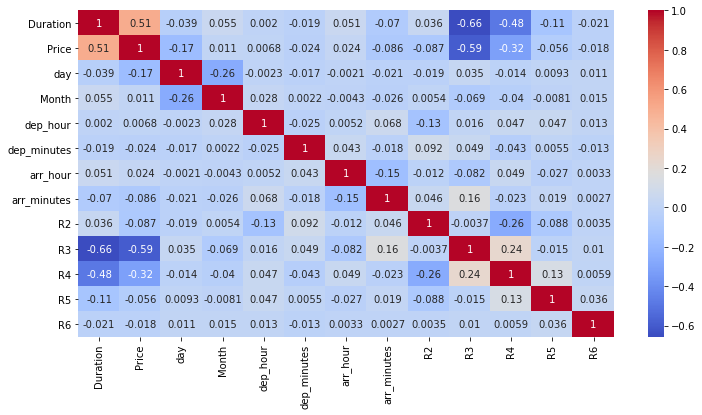

In [102]:
plt.figure(figsize = (12 , 6))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

### Data Preprocessing

In [103]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['Airline', 'Source', 'Destination', 'Additional_Info', 'Stops']

In [104]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints.remove("Price")

In [105]:
ints

['Duration',
 'day',
 'Month',
 'dep_hour',
 'dep_minutes',
 'arr_hour',
 'arr_minutes',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6']

### Features and labels splitting

In [106]:
X = df.drop(["Price"] , axis = 1)
y = df["Price"]

In [107]:
X.head()

,Airline,Source,Destination,Duration,Additional_Info,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,R5,R6,Stops
0,IndiGo,Banglore,New Delhi,170,No info,24,3,22,20,1,10,13,30,13,5,1,0
1,Air India,Kolkata,Banglore,445,No info,5,1,5,50,13,15,25,1,3,5,1,2
2,Jet Airways,Delhi,Cochin,1140,No info,6,9,9,25,4,25,32,4,5,5,1,2
3,IndiGo,Kolkata,Banglore,325,No info,5,12,18,5,23,30,34,3,13,5,1,1
4,IndiGo,Banglore,New Delhi,285,No info,3,1,16,50,21,35,34,8,13,5,1,1


### Removing Skewness

In [108]:
for i in ['Duration','day','Month','dep_hour','dep_minutes','arr_hour','arr_minutes']:
    X[i] = np.log(X[i] + 1)
    df1[i] = np.log(df1[i] + 1)

### Getting Dummies

In [109]:
X = pd.get_dummies(X , columns = ["Airline" , "Source" , "Destination" , "Additional_Info"] , prefix = ["Airline" , "Source" , "Destination" , "Additional_Info"] , drop_first = True)
df1 = pd.get_dummies(df1 , columns = ["Airline" , "Source" , "Destination" , "Additional_Info"] , prefix = ["Airline" , "Source" , "Destination" , "Additional_Info"] , drop_first = True)

In [110]:
X.head().T

,0,1,2,3,4
Duration,5.14166,6.10032,7.03966,5.7869,5.65599
day,3.21888,1.79176,1.94591,1.79176,1.38629
Month,1.38629,0.693147,2.30259,2.56495,0.693147
dep_hour,3.13549,1.79176,2.30259,2.94444,2.83321
dep_minutes,3.04452,3.93183,3.2581,1.79176,3.93183
arr_hour,0.693147,2.63906,1.60944,3.17805,3.09104
arr_minutes,2.3979,2.77259,3.2581,3.43399,3.58352
R2,13,25,32,34,34
R3,30,1,4,3,8
R4,13,3,5,13,13


In [111]:
df1.head().T

,0,1,2,3,4
Duration,6.48616,5.4848,7.26263,6.66058,5.14166
day,1.94591,1.79176,3.09104,3.09104,3.21888
Month,1.94591,2.56495,1.79176,1.79176,1.94591
dep_hour,2.89037,1.94591,2.99573,2.19722,3.17805
dep_minutes,3.43399,3.04452,2.77259,0,4.02535
arr_hour,1.60944,2.3979,2.99573,3.09104,1.09861
arr_minutes,3.2581,3.04452,0,0,3.82864
R2,7,33,7,7,13
R3,6,3,6,6,30
R4,13,13,13,13,13


### Converting Stops column from object to ints

In [112]:
X["Stops"] = X["Stops"].apply(lambda x : int(x))
df1["Stops"] = df1["Stops"].apply(lambda x : int(x))

In [113]:
#viewing null values, datatypes, etc
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      10683 non-null  float64
 1   day                                           10683 non-null  float64
 2   Month                                         10683 non-null  float64
 3   dep_hour                                      10683 non-null  float64
 4   dep_minutes                                   10683 non-null  float64
 5   arr_hour                                      10683 non-null  float64
 6   arr_minutes                                   10683 non-null  float64
 7   R2                                            10683 non-null  int32  
 8   R3                                            10683 non-null  int32  
 9   R4                                            10683 non-null 

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      2671 non-null   float64
 1   day                                           2671 non-null   float64
 2   Month                                         2671 non-null   float64
 3   dep_hour                                      2671 non-null   float64
 4   dep_minutes                                   2671 non-null   float64
 5   arr_hour                                      2671 non-null   float64
 6   arr_minutes                                   2671 non-null   float64
 7   R2                                            2671 non-null   int32  
 8   R3                                            2671 non-null   int32  
 9   R4                                            2671 non-null   i

### Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8546, 2137, 8546, 2137)

### Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hour" , "dep_minutes" , "arr_hour" , "arr_minutes"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
df1[scale_cols] = scaler.transform(df1[scale_cols])

In [117]:
X_train.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
8990,0.339097,-1.410756,1.613559,-1.071813,0.566176,0.485365,0.635100,43,9,9,...,0,0,0,0,0,0,0,0,1,0
3684,1.346383,-0.838524,1.085314,-0.012163,0.566176,0.135266,0.635100,7,6,13,...,0,0,0,0,0,1,0,0,0,0
1034,-0.174410,1.175565,-0.310269,0.553411,0.844051,0.879858,-0.816881,33,6,13,...,0,0,0,0,0,0,0,0,1,0
3909,0.598353,0.995154,-0.759547,0.145198,0.916703,-2.307539,0.635100,7,6,13,...,0,0,0,0,0,0,0,0,1,0
3088,1.386073,1.175565,0.367185,0.784968,0.100487,0.697461,-0.022050,20,4,5,...,0,0,0,0,0,0,0,0,1,0


In [118]:
X_test.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
6076,0.576471,0.788252,0.056817,-1.374869,0.844051,0.630520,-0.022050,7,3,13,...,0,0,0,0,0,1,0,0,0,0
3544,0.213552,-0.620971,-0.759547,-0.183225,0.671461,0.697461,0.635100,7,6,13,...,0,0,0,0,0,0,0,0,1,0
7313,-0.281033,-0.838524,-2.155130,0.426530,-0.590113,0.697461,0.917355,7,3,13,...,0,0,0,0,0,0,0,0,1,0
5032,-1.274318,1.175565,0.056817,0.426530,0.844051,0.559960,-0.816881,8,30,13,...,0,0,0,0,0,0,0,0,1,0
2483,-0.313484,0.995154,0.056817,1.266871,0.916703,-1.111729,0.371388,7,6,13,...,0,0,0,0,0,1,0,0,0,0


In [119]:
df1.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,0.426822,-0.620971,0.367185,0.784968,0.566176,-1.111729,0.371388,7,6,13,...,1,0,0,0,0,0,0,0,0,1
1,-0.681191,-0.838524,1.613559,-1.071813,0.291955,-0.082749,0.198315,33,3,13,...,0,0,0,0,0,0,0,0,0,1
2,1.285986,0.995154,0.056817,0.992104,0.100487,0.697461,-2.268861,7,6,13,...,1,0,0,0,0,0,0,1,0,0
3,0.619812,0.995154,0.056817,-0.577737,-1.851688,0.821846,-2.268861,7,6,13,...,1,0,0,0,0,0,0,0,0,1
4,-1.060870,1.175565,0.367185,1.350542,0.982555,-1.778385,0.833738,13,30,13,...,0,1,0,0,0,0,0,0,0,1


### Model Fitting and Evaluation

In [120]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [121]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['AdaBoostRegressor', AdaBoostRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['Linear Regression', LinearRegression()])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [122]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test , squared = False)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9720


Test Score : 0.9081


K-fold accuracy : 0.9046


Standard Deviation of Accuracies in k-fold : 0.0247


Mean Absolute Error : 743.1471


Root Mean Squared Error : 1394.4850


Mean Squared Log Error : 0.0159


R2_score : 90.8118




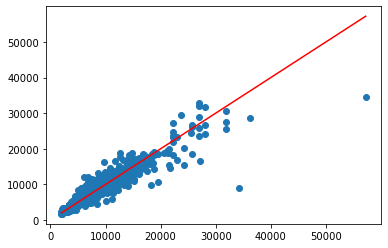



****************************************************************************************************





AdaBoostRegressor


Training score : 0.3551


Test Score : 0.3395


K-fold accuracy : 0.2866


Standard Deviation of Accuracies in k-fold : 0.1649


Mean Absolute Error : 3170.0734


Root Mean Squared Error : 3738.9518


Mean Squared Log Error : 0.2490


R2_score : 33.9455




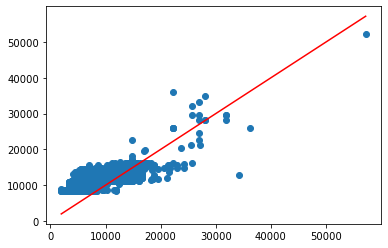



****************************************************************************************************





RandomForest Regressor


Training score : 0.9828


Test Score : 0.8891


K-fold accuracy : 0.8906


Standard Deviation of Accuracies in k-fold : 0.0365


Mean Absolute Error : 617.8158


Root Mean Squared Error : 1532.0105


Mean Squared Log Error : 0.0165


R2_score : 88.9101




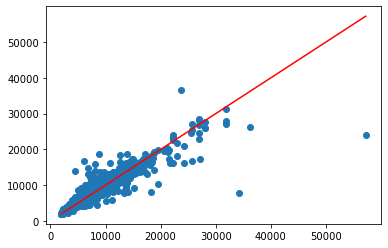



****************************************************************************************************





Linear Regression


Training score : 0.7019


Test Score : 0.7016


K-fold accuracy : 0.6940


Standard Deviation of Accuracies in k-fold : 0.0403


Mean Absolute Error : 1742.4850


Root Mean Squared Error : 2513.0080


Mean Squared Log Error : 0.0664


R2_score : 70.1606




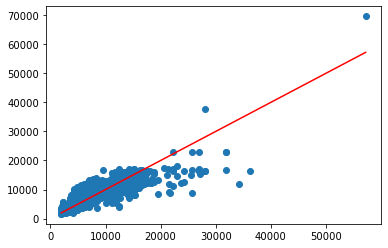



****************************************************************************************************





KNeigbors Regressor


Training score : 0.8743


Test Score : 0.7881


K-fold accuracy : 0.7919


Standard Deviation of Accuracies in k-fold : 0.0374


Mean Absolute Error : 1109.3715


Root Mean Squared Error : 2117.9207


Mean Squared Log Error : 0.0393


R2_score : 78.8055




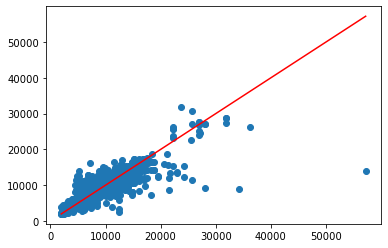



****************************************************************************************************



Wall time: 4min 21s


In [123]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [124]:
pre_final

[(['XGBRegressor',
   0.9719673639067654,
   0.9081179597070816,
   0.9045953119205195,
   0.024698658223329135,
   743.147063823409,
   1394.4849880461072,
   0.015922843988571474,
   90.81179597070816],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.3551248228853232,
   0.3394545873701986,
   0.2865896676851146,
   0.16494312136475758,
   3170.073404904852,
   3738.951817171799,
   0.249022794831104,
   33.9454587370198

In [125]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.9719673639067654,
  0.9081179597070816,
  0.9045953119205195,
  0.024698658223329135,
  743.147063823409,
  1394.4849880461072,
  0.015922843988571474,
  90.81179597070816],
 ['AdaBoostRegressor',
  0.3551248228853232,
  0.3394545873701986,
  0.2865896676851146,
  0.16494312136475758,
  3170.073404904852,
  3738.951817171799,
  0.249022794831104,
  33.94545873701986],
 ['RandomForest Regressor',
  0.9827684796739764,
  0.889101301968906,
  0.890638764722374,
  0.03648277835530176,
  617.8157849937978,
  1532.0105354563289,
  0.016499869877577348,
  88.9101301968906],
 ['Linear Regression',
  0.701869197678576,
  0.7016055791495739,
  0.6939901313040874,
  0.04034197563326611,
  1742.4850249447888,
  2513.0080370111696,
  0.06636843581593273,
  70.1605579149574],
 ['KNeigbors Regressor',
  0.8742748865858851,
  0.7880554110079516,
  0.7918669227901615,
  0.03738396575229328,
  1109.3714553111838,
  2117.9206989669788,
  0.03927913267467448,
  78.80554110079517]]

### Model Evaluation Visualization

In [126]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.971967,0.908118,0.904595,0.024699,743.147064,1394.484988,0.015923,90.811796
1,RandomForest Regressor,0.982768,0.889101,0.890639,0.036483,617.815785,1532.010535,0.016500,88.910130
2,KNeigbors Regressor,0.874275,0.788055,0.791867,0.037384,1109.371455,2117.920699,0.039279,78.805541
3,Linear Regression,0.701869,0.701606,0.693990,0.040342,1742.485025,2513.008037,0.066368,70.160558
4,AdaBoostRegressor,0.355125,0.339455,0.286590,0.164943,3170.073405,3738.951817,0.249023,33.945459


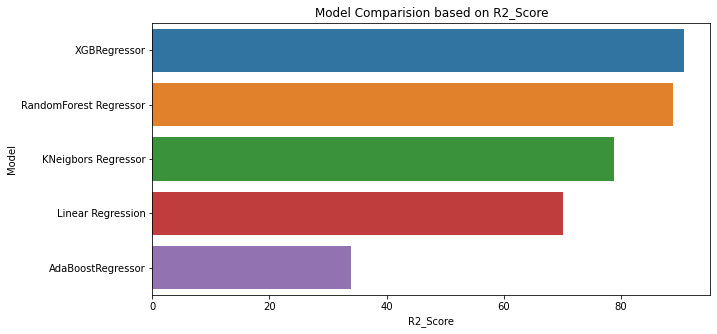

In [127]:
#visualising "Model" on y axis and  "R2_Score" on x axis by using barplot
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "R2_Score" , data = me)
plt.title("Model Comparision based on R2_Score");          #binary variant

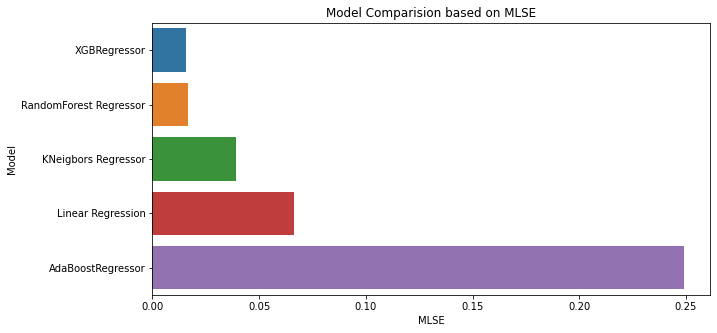

In [128]:
#visualising "Model" on y axis and  "MLSE" on x axis by using barplot
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MLSE" , data = me)
plt.title("Model Comparision based on MLSE");                    #binary variant

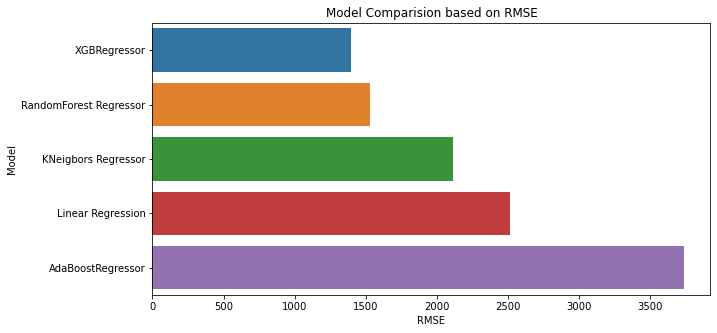

In [129]:
#visualising "Model" on y axis and  "RMSE" on x axis by using barplot
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "RMSE" , data = me)
plt.title("Model Comparision based on RMSE");                        #binary variant

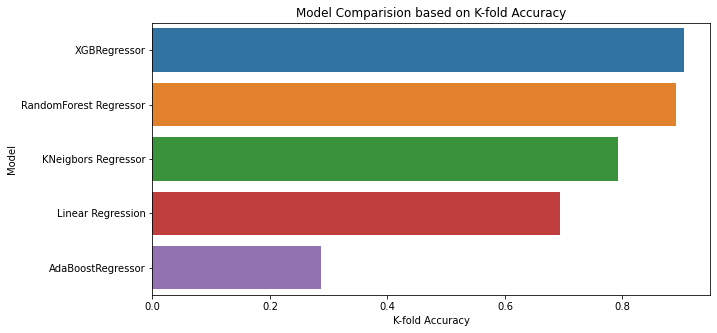

In [130]:
#visualising "Model" on y axis and  "K-fold Accuracy" on x axis by using barplot
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
plt.title("Model Comparision based on K-fold Accuracy");              #binary variant

### Model Evaluation With GridSearchCV

In [131]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
              "max_features" : ['auto', 'sqrt' , "log2"] , 
              "min_samples_leaf" : [2, 4] , 
              "max_depth" : [5 , 7 , 10]}

from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
              "max_features" : ['auto', 'sqrt' , "log2"] , 
              "min_samples_leaf" : [2, 4] , 
              "max_depth" : [5 , 7 , 10]}


grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}

### We will perform only on XGB due to lack of computation power



XGBRegressor


Best Parameters are : 
 {'n_estimators': 200}


Training score : -0.0045


Test Score : -0.0150


K-fold accuracy : -0.0154


Standard Deviation of Accuracies in k-fold : 0.0014


Mean Absolute Error : 694.4356


Root Mean Squared Error : 1376.9180


Mean Squared Log Error : 0.0150


R2_score : 91.0418




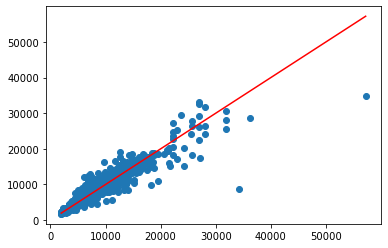



****************************************************************************************************



Wall time: 25min 40s


In [132]:
%%time

xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )

#### Optional Runcell

In [133]:
# %%time

# random = metrics(['RandomForest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid = grid_random , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )

### Getting Feature Importances

In [134]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

In [135]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=2, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature importance list : 
 [6.5141134e-02 1.8603813e-02 1.1765427e-02 3.8749401e-03 3.6736275e-03
 5.3662681e-03 4.3648807e-03 2.0541457e-02 1.0471384e-02 6.2098894e-02
 8.0961557e-03 1.0089542e-03 0.0000000e+00 9.2765875e-03 1.3046788e-02
 2.6930295e-02 1.2948957e-01 3.6512706e-01 3.0295094e-02 7.3368987e-03
 1.6864737e-02 8.8330056e-04 8.7027121e-03 2.7939610e-05 8.1415195e-04
 9.1242082e-03 1.1469765e-02 1.4621856e-02 0.0000000e+00 6.1445269e-03
 0.0000000e+00 0.0000000e+00 8.2371728e-03 0.0000000e+00 1.0519325e-03
 5.9930749e-02 7.6446431e-03 4.4885825e-02 8.3769513e-03 1.5627578e-04
 4.4204472e-03 1.3356005e-04]




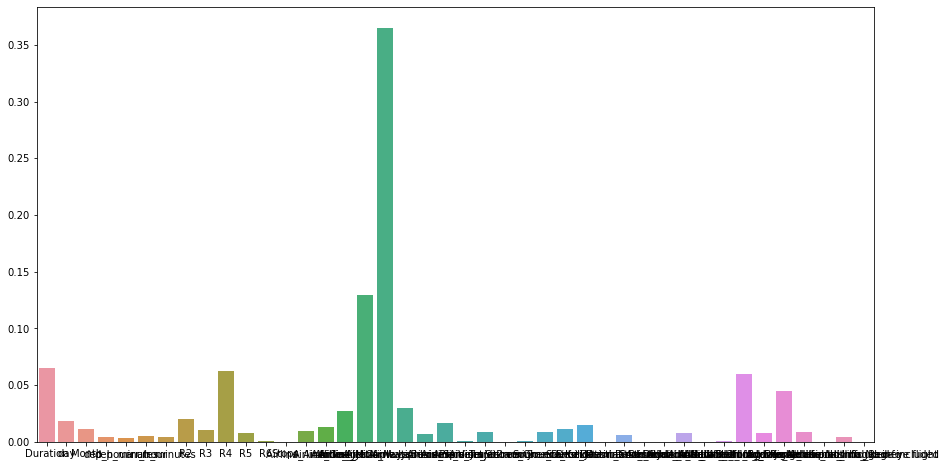



****************************************************************************************************




In [136]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [137]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [138]:
xgb_df

,Feature Importances,Feartures
0,0.365127,Airline_Jet Airways Business
1,0.129490,Airline_Jet Airways
2,0.065141,Duration
3,0.062099,R4
4,0.059931,Additional_Info_Business class
5,0.044886,Additional_Info_In-flight meal not included
6,0.030295,Airline_Multiple carriers
7,0.026930,Airline_IndiGo
8,0.020541,R2
9,0.018604,day


so we can drop columns with 0 importance

In [139]:
X.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,5.141664,3.218876,1.386294,3.135494,3.044522,0.693147,2.397895,13,30,13,...,1,0,0,0,0,0,0,0,1,0
1,6.100319,1.791759,0.693147,1.791759,3.931826,2.639057,2.772589,25,1,3,...,0,0,0,0,0,0,0,0,1,0
2,7.039660,1.945910,2.302585,2.302585,3.258097,1.609438,3.258097,32,4,5,...,0,0,0,0,0,0,0,0,1,0
3,5.786897,1.791759,2.564949,2.944439,1.791759,3.178054,3.433987,34,3,13,...,0,0,0,0,0,0,0,0,1,0
4,5.655992,1.386294,0.693147,2.833213,3.931826,3.091042,3.583519,34,8,13,...,1,0,0,0,0,0,0,0,1,0


In [140]:
df1.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,0.426822,-0.620971,0.367185,0.784968,0.566176,-1.111729,0.371388,7,6,13,...,1,0,0,0,0,0,0,0,0,1
1,-0.681191,-0.838524,1.613559,-1.071813,0.291955,-0.082749,0.198315,33,3,13,...,0,0,0,0,0,0,0,0,0,1
2,1.285986,0.995154,0.056817,0.992104,0.100487,0.697461,-2.268861,7,6,13,...,1,0,0,0,0,0,0,1,0,0
3,0.619812,0.995154,0.056817,-0.577737,-1.851688,0.821846,-2.268861,7,6,13,...,1,0,0,0,0,0,0,0,0,1
4,-1.060870,1.175565,0.367185,1.350542,0.982555,-1.778385,0.833738,13,30,13,...,0,1,0,0,0,0,0,0,0,1


### Preprocessing Missing Columns in Test Set

In [141]:
adds = []
for i in X.columns:
    if i not in df1.columns:
        adds.append(i)
        print(i)

Airline_Trujet
Additional_Info_1 Short layover
Additional_Info_2 Long layover
Additional_Info_No Info
Additional_Info_Red-eye flight


In [142]:
adds

['Airline_Trujet',
 'Additional_Info_1 Short layover',
 'Additional_Info_2 Long layover',
 'Additional_Info_No Info',
 'Additional_Info_Red-eye flight']

In [143]:
for i in adds:
    df1[i] = 0

In [144]:
X

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,5.141664,3.218876,1.386294,3.135494,3.044522,0.693147,2.397895,13,30,13,...,1,0,0,0,0,0,0,0,1,0
1,6.100319,1.791759,0.693147,1.791759,3.931826,2.639057,2.772589,25,1,3,...,0,0,0,0,0,0,0,0,1,0
2,7.039660,1.945910,2.302585,2.302585,3.258097,1.609438,3.258097,32,4,5,...,0,0,0,0,0,0,0,0,1,0
3,5.786897,1.791759,2.564949,2.944439,1.791759,3.178054,3.433987,34,3,13,...,0,0,0,0,0,0,0,0,1,0
4,5.655992,1.386294,0.693147,2.833213,3.931826,3.091042,3.583519,34,8,13,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5.017280,1.609438,2.302585,2.995732,4.025352,3.135494,3.258097,5,30,13,...,0,0,0,0,0,0,0,0,1,0
10679,5.049856,3.332205,1.609438,3.044522,3.828641,3.178054,3.044522,5,30,13,...,0,0,0,0,0,0,0,0,1,0
10680,5.198497,3.332205,1.609438,2.197225,3.044522,2.484907,3.044522,13,30,13,...,0,0,0,0,0,0,0,0,1,0
10681,5.081404,1.386294,0.693147,2.484907,3.433987,2.708050,2.397895,13,30,13,...,1,0,0,0,0,0,0,0,1,0


In [145]:
df1 = df1[X.columns]
df1

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.426822,-0.620971,0.367185,0.784968,0.566176,-1.111729,0.371388,7,6,13,...,0,0,0,0,0,0,0,0,1,0
1,-0.681191,-0.838524,1.613559,-1.071813,0.291955,-0.082749,0.198315,33,3,13,...,0,0,0,0,0,0,0,0,1,0
2,1.285986,0.995154,0.056817,0.992104,0.100487,0.697461,-2.268861,7,6,13,...,0,0,0,0,0,1,0,0,0,0
3,0.619812,0.995154,0.056817,-0.577737,-1.851688,0.821846,-2.268861,7,6,13,...,0,0,0,0,0,0,0,0,1,0
4,-1.060870,1.175565,0.367185,1.350542,0.982555,-1.778385,0.833738,13,30,13,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.293719,-0.620971,0.367185,1.088024,0.566176,0.761135,0.371388,14,3,13,...,0,0,0,0,0,0,0,0,1,0
2667,-1.162455,1.335506,-0.759547,0.426530,0.291955,0.485365,0.993146,5,30,13,...,0,0,0,0,0,0,0,0,1,0
2668,-0.131682,-1.410756,0.367185,1.179481,0.916703,-1.111729,0.371388,7,6,13,...,0,0,0,0,0,0,0,0,1,0
2669,0.796234,-1.410756,0.367185,-1.733307,-1.851688,0.697461,-0.022050,7,6,13,...,0,0,0,0,0,0,0,0,1,0


Dropping columns with zero importance towards the model

In [146]:
X.drop(["Additional_Info_1 Short layover" , "Destination_Kolkata" , "Destination_Hyderabad" , "Destination_Cochin" , "Stops"] , axis = 1 , inplace = True)

In [147]:
df1.drop(["Additional_Info_1 Short layover" , "Destination_Kolkata" , "Destination_Hyderabad" , "Destination_Cochin" , "Stops"] , axis = 1 , inplace = True)

## Model Evaluation After Removing Useless columns

In [148]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8546, 2137, 8546, 2137)

### Scaling

In [149]:
scaler1 = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hour" , "dep_minutes" , "arr_hour" , "arr_minutes"]
X_train[scale_cols] = scaler1.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler1.transform(X_test[scale_cols])

In [150]:
X_train.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_Delhi,Destination_New Delhi,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
8990,0.339097,-1.410756,1.613559,-1.071813,0.566176,0.485365,0.635100,43,9,9,...,0,0,0,0,0,0,0,0,1,0
3684,1.346383,-0.838524,1.085314,-0.012163,0.566176,0.135266,0.635100,7,6,13,...,0,0,0,0,0,1,0,0,0,0
1034,-0.174410,1.175565,-0.310269,0.553411,0.844051,0.879858,-0.816881,33,6,13,...,0,0,0,0,0,0,0,0,1,0
3909,0.598353,0.995154,-0.759547,0.145198,0.916703,-2.307539,0.635100,7,6,13,...,0,0,0,0,0,0,0,0,1,0
3088,1.386073,1.175565,0.367185,0.784968,0.100487,0.697461,-0.022050,20,4,5,...,0,0,0,0,0,0,0,0,1,0


In [151]:
X_test.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_Delhi,Destination_New Delhi,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
6076,0.576471,0.788252,0.056817,-1.374869,0.844051,0.630520,-0.022050,7,3,13,...,0,0,0,0,0,1,0,0,0,0
3544,0.213552,-0.620971,-0.759547,-0.183225,0.671461,0.697461,0.635100,7,6,13,...,0,0,0,0,0,0,0,0,1,0
7313,-0.281033,-0.838524,-2.155130,0.426530,-0.590113,0.697461,0.917355,7,3,13,...,0,0,0,0,0,0,0,0,1,0
5032,-1.274318,1.175565,0.056817,0.426530,0.844051,0.559960,-0.816881,8,30,13,...,0,0,0,0,0,0,0,0,1,0
2483,-0.313484,0.995154,0.056817,1.266871,0.916703,-1.111729,0.371388,7,6,13,...,0,0,0,0,0,1,0,0,0,0


In [152]:
df1.head()

,Duration,day,Month,dep_hour,dep_minutes,arr_hour,arr_minutes,R2,R3,R4,...,Destination_Delhi,Destination_New Delhi,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.426822,-0.620971,0.367185,0.784968,0.566176,-1.111729,0.371388,7,6,13,...,0,0,0,0,0,0,0,0,1,0
1,-0.681191,-0.838524,1.613559,-1.071813,0.291955,-0.082749,0.198315,33,3,13,...,0,0,0,0,0,0,0,0,1,0
2,1.285986,0.995154,0.056817,0.992104,0.100487,0.697461,-2.268861,7,6,13,...,0,0,0,0,0,1,0,0,0,0
3,0.619812,0.995154,0.056817,-0.577737,-1.851688,0.821846,-2.268861,7,6,13,...,0,0,0,0,0,0,0,0,1,0
4,-1.060870,1.175565,0.367185,1.350542,0.982555,-1.778385,0.833738,13,30,13,...,1,0,0,0,0,0,0,0,1,0




XGBRegressor


Training score : 0.9720


Test Score : 0.9081


K-fold accuracy : 0.9051


Standard Deviation of Accuracies in k-fold : 0.0245


Mean Absolute Error : 743.1471


Root Mean Squared Error : 1394.4850


Mean Squared Log Error : 0.0159


R2_score : 90.8118




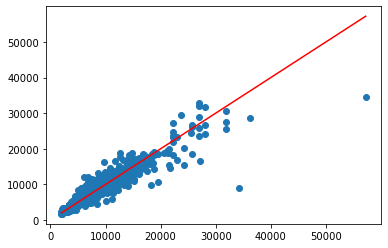



****************************************************************************************************





AdaBoostRegressor


Training score : 0.3551


Test Score : 0.3395


K-fold accuracy : 0.2671


Standard Deviation of Accuracies in k-fold : 0.1715


Mean Absolute Error : 3170.0734


Root Mean Squared Error : 3738.9518


Mean Squared Log Error : 0.2490


R2_score : 33.9455




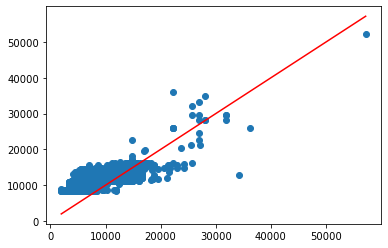



****************************************************************************************************





RandomForest Regressor


Training score : 0.9829


Test Score : 0.8900


K-fold accuracy : 0.8899


Standard Deviation of Accuracies in k-fold : 0.0375


Mean Absolute Error : 616.0548


Root Mean Squared Error : 1526.1122


Mean Squared Log Error : 0.0164


R2_score : 88.9954




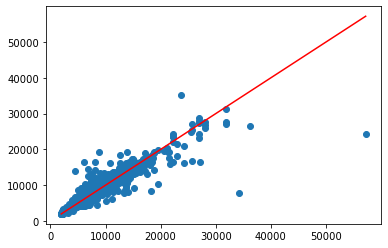



****************************************************************************************************





Linear Regression


Training score : 0.6978


Test Score : 0.7005


K-fold accuracy : 0.6904


Standard Deviation of Accuracies in k-fold : 0.0408


Mean Absolute Error : 1747.8785


Root Mean Squared Error : 2517.5553


Mean Squared Log Error : 0.0661


R2_score : 70.0525




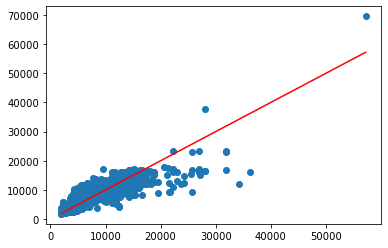



****************************************************************************************************





KNeigbors Regressor


Training score : 0.8746


Test Score : 0.7869


K-fold accuracy : 0.7920


Standard Deviation of Accuracies in k-fold : 0.0374


Mean Absolute Error : 1111.8141


Root Mean Squared Error : 2123.5933


Mean Squared Log Error : 0.0393


R2_score : 78.6919




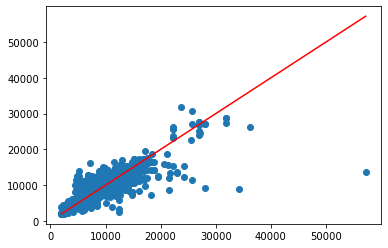



****************************************************************************************************



Wall time: 2min 19s


In [153]:
%%time

final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    final.append(sam)

In [154]:
final

[(['XGBRegressor',
   0.9719673639067654,
   0.9081179597070816,
   0.9051002443017853,
   0.024450692045269857,
   743.147063823409,
   1394.4849880461072,
   0.015922843988571474,
   90.81179597070816],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.3551248228853232,
   0.3394545873701986,
   0.26714403456820623,
   0.17146071981332486,
   3170.073404904852,
   3738.951817171799,
   0.249022794831104,
   33.945458737019

In [155]:
data_final = [x[0] for x in final]
data_final

[['XGBRegressor',
  0.9719673639067654,
  0.9081179597070816,
  0.9051002443017853,
  0.024450692045269857,
  743.147063823409,
  1394.4849880461072,
  0.015922843988571474,
  90.81179597070816],
 ['AdaBoostRegressor',
  0.3551248228853232,
  0.3394545873701986,
  0.26714403456820623,
  0.17146071981332486,
  3170.073404904852,
  3738.951817171799,
  0.249022794831104,
  33.94545873701986],
 ['RandomForest Regressor',
  0.9829244579057742,
  0.8899535898684093,
  0.8899405521006741,
  0.03745098046998424,
  616.0547931215693,
  1526.1122136246836,
  0.016425226343600993,
  88.99535898684093],
 ['Linear Regression',
  0.6978007602548755,
  0.7005247201450729,
  0.6903807298852453,
  0.04077190745154124,
  1747.8784817990002,
  2517.5552938048777,
  0.06610620370615602,
  70.05247201450729],
 ['KNeigbors Regressor',
  0.874628284919719,
  0.7869185615715442,
  0.7919559365378086,
  0.03743238548743282,
  1111.8141319606925,
  2123.59325907654,
  0.0393080098338791,
  78.69185615715442]]

In [156]:
# Before removing useless columns
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.971967,0.908118,0.904595,0.024699,743.147064,1394.484988,0.015923,90.811796
1,RandomForest Regressor,0.982768,0.889101,0.890639,0.036483,617.815785,1532.010535,0.016500,88.910130
2,KNeigbors Regressor,0.874275,0.788055,0.791867,0.037384,1109.371455,2117.920699,0.039279,78.805541
3,Linear Regression,0.701869,0.701606,0.693990,0.040342,1742.485025,2513.008037,0.066368,70.160558
4,AdaBoostRegressor,0.355125,0.339455,0.286590,0.164943,3170.073405,3738.951817,0.249023,33.945459


In [157]:
# After Removing useless columns

mef = pd.DataFrame(data_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

mef.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
mef = mef.reset_index(drop = True)
mef

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.971967,0.908118,0.905100,0.024451,743.147064,1394.484988,0.015923,90.811796
1,RandomForest Regressor,0.982924,0.889954,0.889941,0.037451,616.054793,1526.112214,0.016425,88.995359
2,KNeigbors Regressor,0.874628,0.786919,0.791956,0.037432,1111.814132,2123.593259,0.039308,78.691856
3,Linear Regression,0.697801,0.700525,0.690381,0.040772,1747.878482,2517.555294,0.066106,70.052472
4,AdaBoostRegressor,0.355125,0.339455,0.267144,0.171461,3170.073405,3738.951817,0.249023,33.945459


### Final Model

In [158]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=2, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature importance list : 
 [6.5141134e-02 1.8603813e-02 1.1765425e-02 3.8749396e-03 3.6736270e-03
 5.3662676e-03 4.3648803e-03 2.0541456e-02 1.0471383e-02 6.2098887e-02
 8.0961548e-03 1.0089541e-03 9.2765866e-03 1.3046787e-02 2.6930293e-02
 1.2948956e-01 3.6512703e-01 3.0295093e-02 7.3368978e-03 1.6864736e-02
 8.8330050e-04 8.7027112e-03 2.7939608e-05 8.1415189e-04 9.1242073e-03
 1.1469763e-02 1.4621855e-02 6.1445259e-03 8.2371719e-03 1.0519323e-03
 5.9930742e-02 7.6446426e-03 4.4885822e-02 8.3769504e-03 1.5627577e-04
 4.4204467e-03 1.3356005e-04]




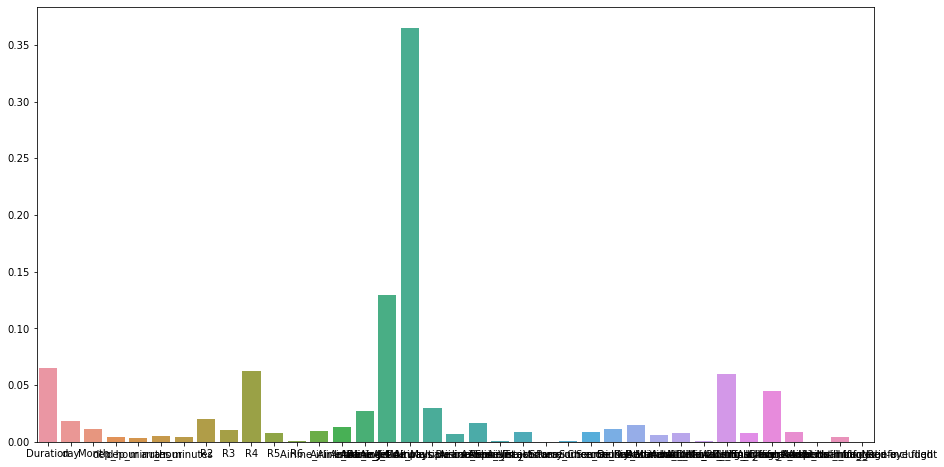



****************************************************************************************************




In [159]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [160]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [161]:
xgb_df

,Feature Importances,Feartures
0,0.365127,Airline_Jet Airways Business
1,0.129490,Airline_Jet Airways
2,0.065141,Duration
3,0.062099,R4
4,0.059931,Additional_Info_Business class
5,0.044886,Additional_Info_In-flight meal not included
6,0.030295,Airline_Multiple carriers
7,0.026930,Airline_IndiGo
8,0.020541,R2
9,0.018604,day


In [162]:
preds = xgb.predict(X_test)
preds

array([10720.71 ,  6499.004, 14947.622, ...,  6507.146,  4671.482,
       14267.636], dtype=float32)

### Final model performance visualization

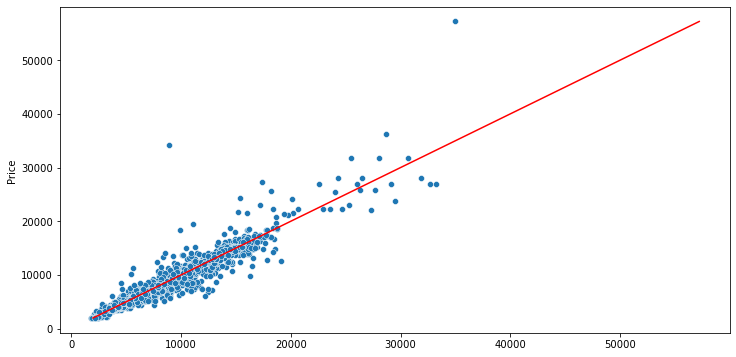

In [163]:
#visualisation by scatterplot
plt.figure(figsize = (12 , 6))
sns.scatterplot(preds , y_test)
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Price', ylabel='Density'>

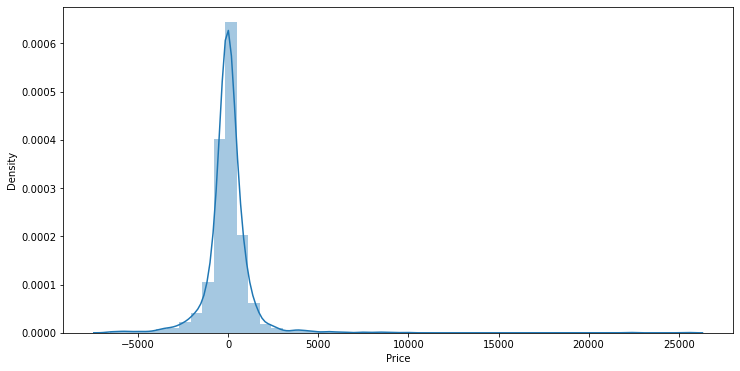

In [164]:
#distribution plot
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - preds)

### Saving model with pickle module

In [165]:
import pickle
pickle.dump(xgb, open("Flights Xgb.h5", 'wb'))

### Predicting on Test Set

In [166]:
test_preds = xgb.predict(df1)
test_preds

array([13980.228 ,  4542.8657, 12542.19  , ..., 16605.176 , 12193.35  ,
        7556.6943], dtype=float32)

In [167]:
final = pd.DataFrame(test_preds , columns = ["Price"])
final

,Price
0,13980.227539
1,4542.865723
2,12542.190430
3,11577.911133
4,3674.934570
...,...
2666,10281.958008
2667,5104.645508
2668,16605.175781
2669,12193.349609


### Downlaoding the submission file

In [168]:
final.to_csv("Flight Rate 1.csv" , index = False)